In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [27]:
# Učitavanje dataset-a

data = {
    'Fizicka_aktivnost': ['Da', 'Da', 'Da', 'Ne', 'Ne', 'Ne'],

    'Umjerena_ishrana': ['Da', 'Ne', 'Da', 'Ne', 'Da', 'Da'],

    'Stres': ['Ne', 'Da', 'Da', 'Da', 'Ne', 'Ne'],

    'Visok_pritisak': ['Da', 'Ne', 'Da', 'Da', 'Ne', 'Ne'],

    'Oboljenje srca': ['Ne', 'Ne', 'Da', 'Da', 'Ne', 'Da']
}

df = pd.DataFrame(data)

In [28]:
# Predprocesiranje podataka (kodiranje kategoričkih varijabli ili normalizacija numeričkih varijabli)
label_encoder = LabelEncoder()
df['Fizicka_aktivnost'] = label_encoder.fit_transform(df['Fizicka_aktivnost'])
df['Umjerena_ishrana'] = label_encoder.fit_transform(df['Umjerena_ishrana'])
df['Stres'] = label_encoder.fit_transform(df['Stres'])
df['Visok_pritisak'] = label_encoder.fit_transform(df['Visok_pritisak'])
df['Oboljenje srca'] = label_encoder.fit_transform(df['Oboljenje srca'])

In [29]:
df

,Fizicka_aktivnost,Umjerena_ishrana,Stres,Visok_pritisak,Oboljenje srca
0,0,0,1,0,1
1,0,1,0,1,1
2,0,0,0,0,0
3,1,1,0,0,0
4,1,0,1,1,1
5,1,0,1,1,0


In [30]:
# Podjela podataka na skupove za treniranje i testiranje

X = df.drop(['Oboljenje srca'], axis=1)
y = df['Oboljenje srca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=17)

In [31]:
# Izgradnja stabla odlučivanja i klasifikacija
clf = DecisionTreeClassifier(criterion='gini') #gini index
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# Pretvaranje indeksa u listu
feature_names = list(X.columns)

# Ispis stabla odlučivanja
tree_text = export_text(clf, feature_names=feature_names)
print(tree_text)

|--- Fizicka_aktivnost <= 0.50
|   |--- class: 1
|--- Fizicka_aktivnost >  0.50
|   |--- class: 0



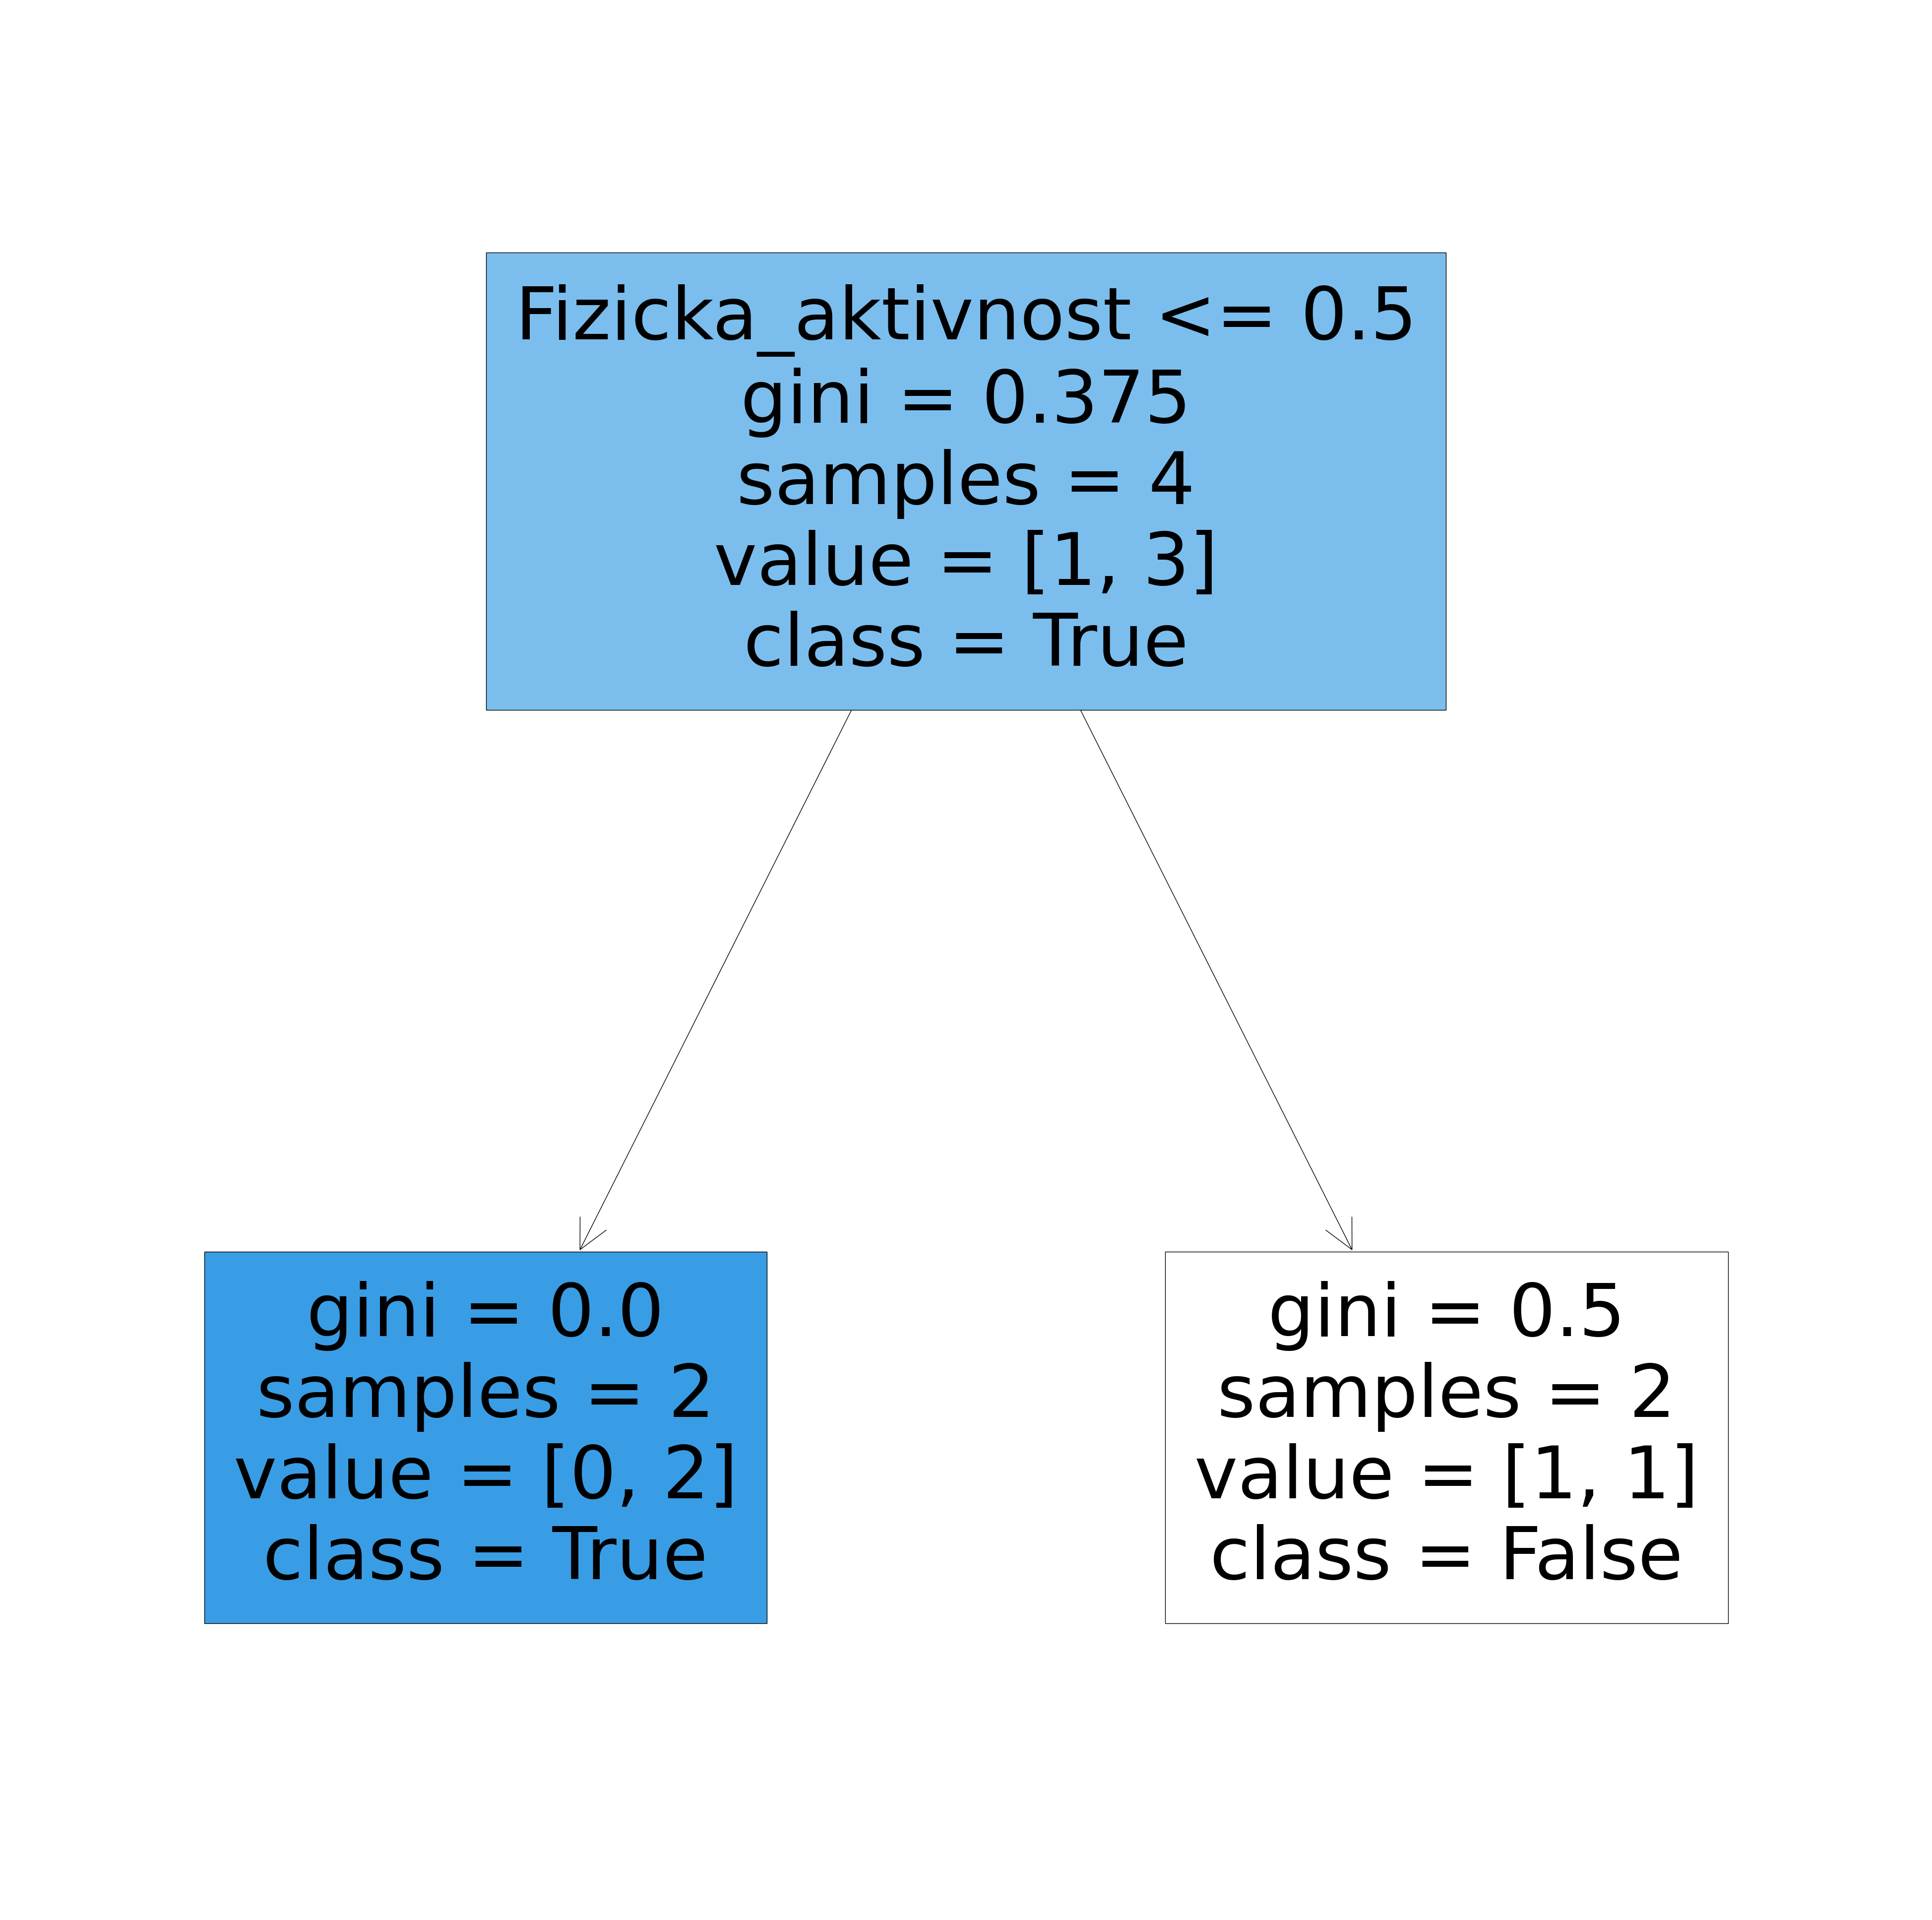

In [33]:
# Ispis stabla odlučivanja
fig = plt.figure(figsize=(50, 50))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], filled=True)
plt.show()

In [34]:
# Predviđanje testnog skupa
y_pred = clf.predict(X_test)
y_pred

array([1, 0])

In [35]:
# Izvršavanje klasifikacije nad jednim podatkom

# nakon što smo kodirali vrijednosti iz dataset-a 0=Da, 1=Ne.
# predikcija se vrsi za osobu koja je fizicki aktivna ali nema umjerenu ishranu, pod stresom je ali nema visok pritisak
new_data = {
    'Fizicka_aktivnost': [0],
    'Umjerena_ishrana': [1],
    'Stres': [0],
    'Visok_pritisak': [1],
    'Oboljenje srca': [0]
}

# Pretvaranje riječnika u DataFrame
new_data_df = pd.DataFrame(new_data)

# Izdvajanje karakteristika za predikciju
X_new = new_data_df.drop(['Oboljenje srca'], axis=1)

# Izvršavanje predikcije na novim podacima
y_new_pred = clf.predict(X_new)

# Ispis predikcije
print("Da li osoba ima bolest srca: ", y_new_pred)

Da li osoba ima bolest srca:  [1]
